<a href="https://colab.research.google.com/github/Lina121111111/tries_with_pandas/blob/main/sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KeyError: 'petal width(cm)'

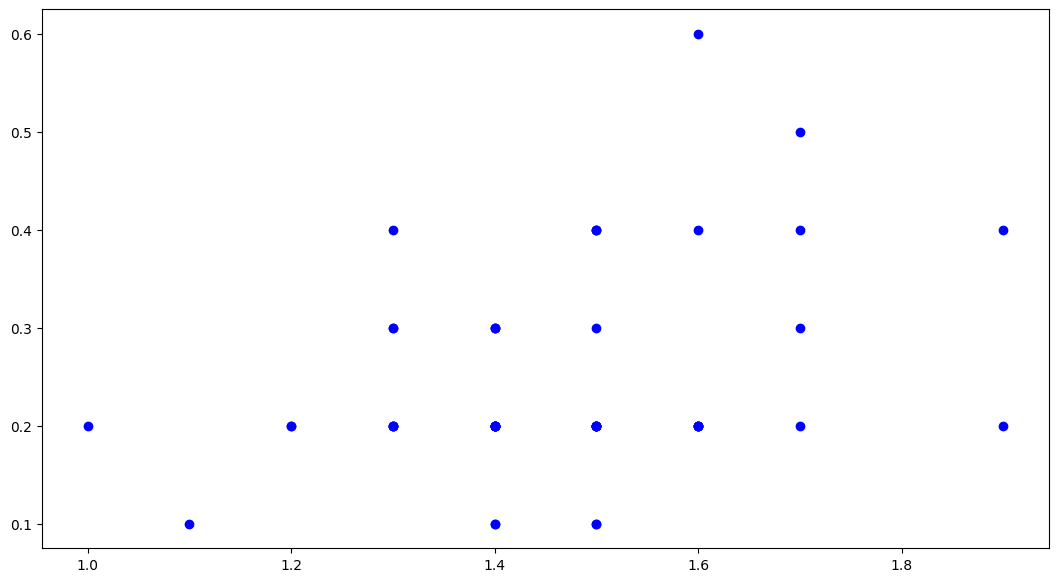

In [5]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
data = datasets.load_iris()


# Создадим DataFrame.
df = pd.DataFrame(data.data, columns=data.feature_names)
# Добавим столбец "target" и заполним его данными.
df['target'] = data.target
# Выведем на экран первые пять строк.
df.head()
species = []

for i in range(len(df['target'])):
   if df['target'][i] == 0:
       species.append("setosa")
   elif df['target'][i] == 1:
       species.append('versicolor')
   else:
       species.append('virginica')

df['species'] = species
df.head()



setosa = df[df.species == 'setosa']
versicolor = df[df.species == 'versicolor']
virginica = df[df.species == 'virginica']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # Задаём размеры графика.

# Подписываем и отрисовываем точки.
ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width(cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")

ax.set_xlabel("длина чашелистика (см)")
ax.set_ylabel("ширина чашелистика (см)")
ax.grid()
ax.set_title("Чашелистики у ирисов")
ax.legend()

In [8]:
from sklearn.model_selection import train_test_split
# Удалим из датасета два столбца, которые не нужны нам для обучения.
X = df.drop(['target','species'], axis=1)

# Переведём значения длины и ширины чашелистика в массив NumPy.
X = X.to_numpy()[:, (2,3)]
y = df['target']

# Разделим данные на тестовую и тренировочную выборку.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [10]:
training_prediction = log_reg.predict(X_train)
training_prediction

array([1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1, 0,
       0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1,
       1, 2, 2, 0, 1, 1, 0, 1, 2])

In [11]:
test_prediction = log_reg.predict(X_test)
test_prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 2, 2, 1])

In [12]:
from sklearn import metrics

print("Precision, Recall в тренировочной выборке\n")

# Считаем Recall.
print(metrics.classification_report(y_train, training_prediction, digits=3))

Precision, Recall в тренировочной выборке

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        21
           1      0.923     0.889     0.906        27
           2      0.893     0.926     0.909        27

    accuracy                          0.933        75
   macro avg      0.939     0.938     0.938        75
weighted avg      0.934     0.933     0.933        75



In [13]:
print("Precision, Recall в тестовой выборке")

# Считаем Recall.
print(metrics.classification_report(y_test, test_prediction, digits=3))

Precision, Recall в тестовой выборке
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        29
           1      1.000     1.000     1.000        23
           2      1.000     1.000     1.000        23

    accuracy                          1.000        75
   macro avg      1.000     1.000     1.000        75
weighted avg      1.000     1.000     1.000        75

